# Estudo de analise de dados com python e pandas

Nesse notebook vou fazer analise dos dados de vendas da AdventureWorks contido no arquivo AdventureWorks.xlsx. Baseado nos conhecimentos adquiridos no Bootcamp DIO-Banco Carrefour Data Engineer.

* Importando bibliotecas que iremos utilizar 




In [98]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

import locale
locale.setlocale(locale.LC_MONETARY, 'en_US.UTF-8')

pd.options.display.float_format = '{:,.2f}'.format #defini exibição float em 2 casas

* Criando o dataframe a partir do arquivo do github, e verificando os dados carregados, qtd de linhas e tipos das colunas

In [99]:
#Criando DataFrame
df = pd.read_excel("https://github.com/marciojardson/dio-carrefour-analisecompandas/blob/master/AdventureWorks.xlsx?raw=true")

#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [100]:
#Quantidade de linhas e colunas
quantRegistros = df.shape[0]
print('Quantidade de Registros: ',quantRegistros)
print('\nColunas:')
df.info()

Quantidade de Registros:  904

Colunas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data Venda      904 non-null    datetime64[ns]
 1   Data Envio      904 non-null    datetime64[ns]
 2   ID Loja         904 non-null    int64         
 3   ID Produto      904 non-null    int64         
 4   ID Cliente      904 non-null    int64         
 5   No. Venda       904 non-null    object        
 6   Custo Unitário  904 non-null    float64       
 7   Preço Unitário  904 non-null    float64       
 8   Quantidade      904 non-null    int64         
 9   Valor Desconto  904 non-null    float64       
 10  Valor Venda     904 non-null    float64       
 11  Produto         904 non-null    object        
 12  Fabricante      904 non-null    object        
 13  Marca           904 non-null    object        
 14  Classe          90

* Renomeando colunas para facilitar manipulação:

In [101]:
df.columns=['data_venda','data_envio', 'id_loja','id_produto', 'id_cliente','num_venda','custo_unidade','preco_unidade','quantidade','valor_desconto','valor_venda','produto','fabricante','marca','classe','cor']
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   data_venda      904 non-null    datetime64[ns]
 1   data_envio      904 non-null    datetime64[ns]
 2   id_loja         904 non-null    int64         
 3   id_produto      904 non-null    int64         
 4   id_cliente      904 non-null    int64         
 5   num_venda       904 non-null    object        
 6   custo_unidade   904 non-null    float64       
 7   preco_unidade   904 non-null    float64       
 8   quantidade      904 non-null    int64         
 9   valor_desconto  904 non-null    float64       
 10  valor_venda     904 non-null    float64       
 11  produto         904 non-null    object        
 12  fabricante      904 non-null    object        
 13  marca           904 non-null    object        
 14  classe          904 non-null    object        
 15  cor   

* Mostrando os valores totais de custos, venda, lucro e os descontos sobre as vendas. Para isso criamos uma nova coluna valor_custo

In [102]:
df["valor_custo"] = df["custo_unidade"].mul(df["quantidade"]) #Criando a coluna de custo
df["valor_lucro"] = df["valor_venda"].sub(df["valor_custo"]) #Criando a coluna de lucro

In [103]:


totalVenda = df["valor_venda"].sum()
totalCusto = df["valor_custo"].sum()
totalDesconto = df["valor_desconto"].sum()
totalProdutos = df["quantidade"].sum()

totalLucro=  df["valor_lucro"].sum()
print('Valores de Vendas:')

print(f'Quantidade de Vendas: {quantRegistros:,}')
print(f'Quantidade de Produtos Vendidos: {totalProdutos:,}\n')

print(f'Total Custo: {locale.currency(totalCusto, grouping=True)}')
print(f'Total Venda: {locale.currency(totalVenda, grouping=True)}')
print(f'Total Lucro: {locale.currency(totalLucro, grouping=True)}')
print(f'Total Descontos: {locale.currency(totalDesconto, grouping=True)}')

Valores de Vendas:
Quantidade de Vendas: 904
Quantidade de Produtos Vendidos: 56,907

Total Custo: $2,486,783.05
Total Venda: $5,984,606.14
Total Lucro: $3,497,823.09
Total Descontos: $622,967.46


* Exibir lucro por lojas:

In [104]:

sum = df.groupby('id_loja').sum().loc[:,{'valor_custo','valor_venda','valor_lucro'}]
display(sum)

,valor_lucro,valor_custo,valor_venda
id_loja,,,
199,"1,294,718.51","886,385.58","2,181,104.09"
306,"1,016,493.12","707,360.49","1,723,853.61"
307,"1,186,611.46","893,036.98","2,079,648.44"


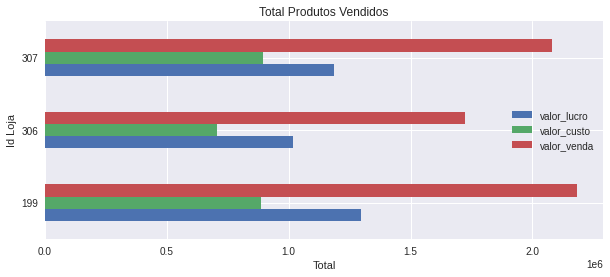

In [105]:
sum.plot.barh(title="Total Produtos Vendidos", figsize=(10,4))
plt.xlabel("Total")
plt.ylabel("Id Loja");

* Analizar tempo médio de envio por loja e fabricante:

In [106]:
df["tempo_envio"] = (df["data_envio"] - df["data_venda"]).dt.days
aux = df.loc[:,{'id_loja', 'tempo_envio'}]
print('Tempo médio de envio por Loja:')
aux.groupby('id_loja').mean()

Tempo médio de envio por Loja:


,tempo_envio
id_loja,
199,8.56
306,7.96
307,9.03


In [107]:
aux = df.loc[:,{'fabricante', 'tempo_envio'}]
print('Tempo médio de envio por fabricante:')
aux.groupby('fabricante').mean()

Tempo médio de envio por fabricante:


,tempo_envio
fabricante,
Adventure Works,8.66
"Contoso, Ltd",8.47
"Fabrikam, Inc.",8.51


In [108]:
#Gráfico de Boxplot
df["tempo_envio"].describe()

count   904.00
mean      8.54
std       3.06
min       4.00
25%       6.00
50%       9.00
75%      11.00
max      20.00
Name: tempo_envio, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7fdd21aaf650>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdd21446250>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd21aff890>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd21aff610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdd21aaf090>,
  <matplotlib.lines.Line2D at 0x7fdd21c5c190>]}

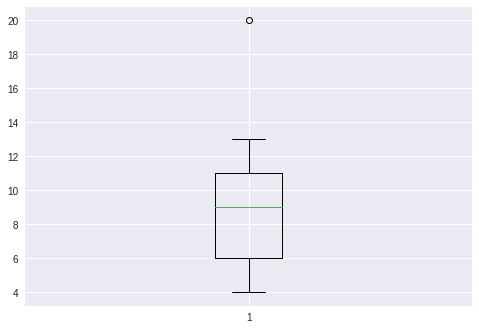

In [109]:
plt.boxplot(df["tempo_envio"])

* Lucro por Ano e Marca.

In [110]:
#Vamos Agrupar por ano e marca
df.groupby([df["data_venda"].dt.year, "marca"])["valor_lucro"].sum()

data_venda  marca          
2008        Adventure Works     306,641.16
            Contoso              56,416.00
            Fabrikam          1,557,020.55
2009        Adventure Works     405,395.08
            Contoso             138,258.95
            Fabrikam          1,034,091.35
Name: valor_lucro, dtype: float64

*  Produtos mais Vendidos:

In [111]:
#Qual o total de produtos vendidos?
df.groupby("produto")["quantidade"].sum().sort_values(ascending=False)

produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: quantidade, dtype: int64

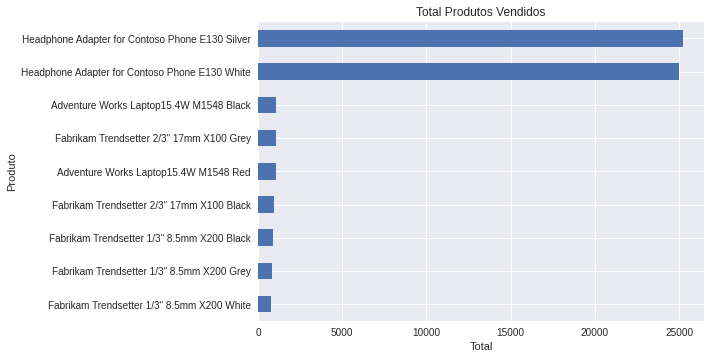

In [112]:
#Gráfico Total de produtos vendidos
df.groupby("produto")["quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

*  Lucro por Ano e mês

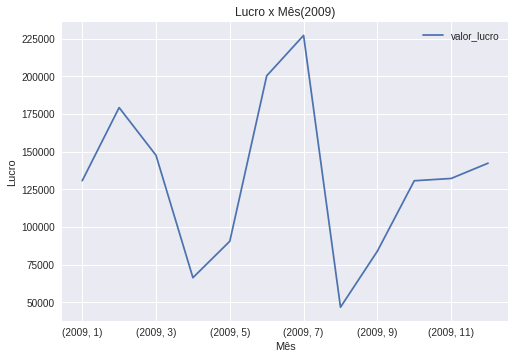

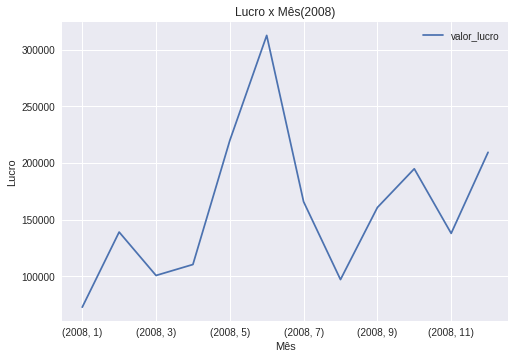

In [113]:
df_2009 = df[df["data_venda"].dt.year == 2009]
aux =df_2009.loc[:,{"data_venda","valor_lucro"}].groupby([df["data_venda"].dt.year, df["data_venda"].dt.month]).sum()
aux.plot(title="Lucro x Mês(2009)")
plt.xlabel("Mês")
plt.ylabel("Lucro");

df_2008 = df[df["data_venda"].dt.year == 2008]
aux =df_2008.loc[:,{"data_venda","valor_lucro"}].groupby([df["data_venda"].dt.year, df["data_venda"].dt.month]).sum()
aux.plot(title="Lucro x Mês(2008)")
plt.xlabel("Mês")
plt.ylabel("Lucro");

* Lucro Por Marca

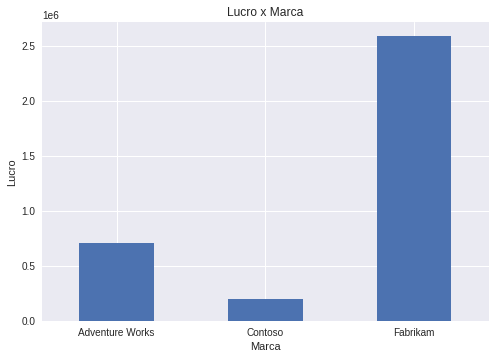

In [114]:
df.groupby("marca")["valor_lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

* Lucro Por Classe

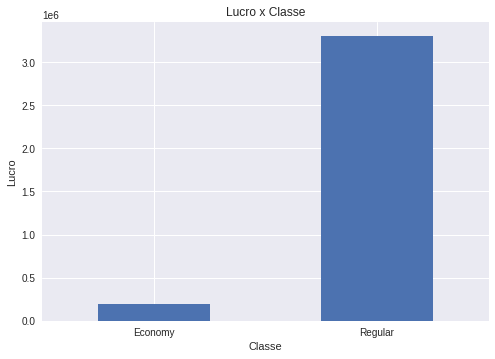

In [115]:
df.groupby("classe")["valor_lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');